# Chest x_ray prediction

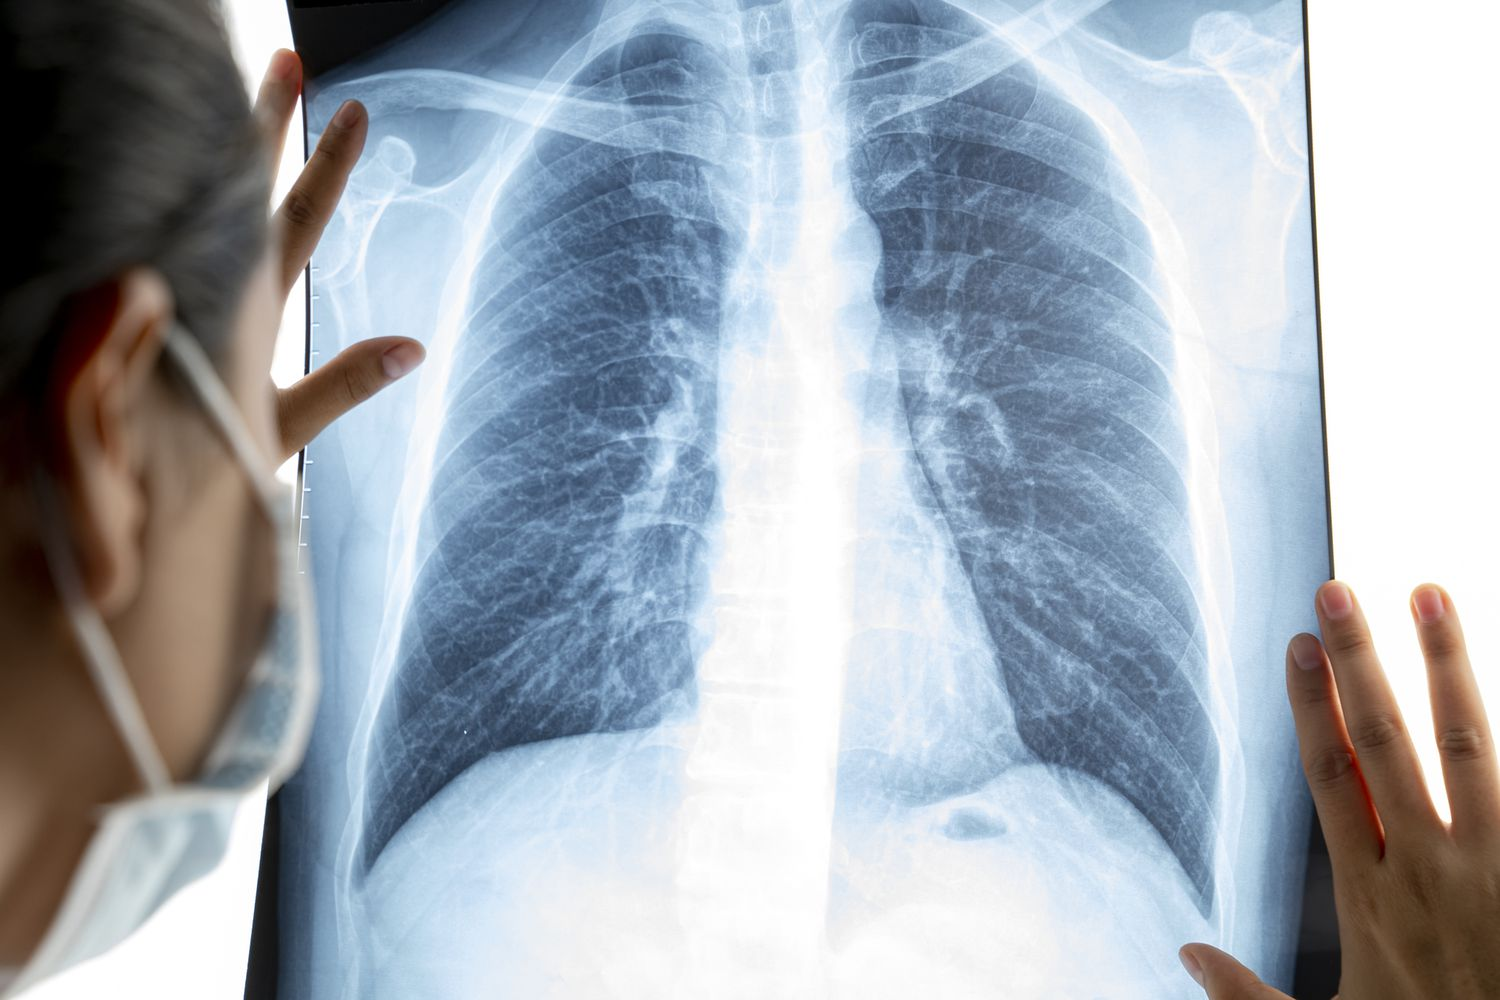

In [1]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\GettyImages.jpg")

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 90% 142M/158M [00:00<00:00, 186MB/s]
100% 158M/158M [00:01<00:00, 155MB/s]


## Unzipping file 

In [3]:
import zipfile
file=zipfile.ZipFile('/content/covid19-image-dataset.zip','r')
file.extractall('/content')
file.close() 

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Image visualization  

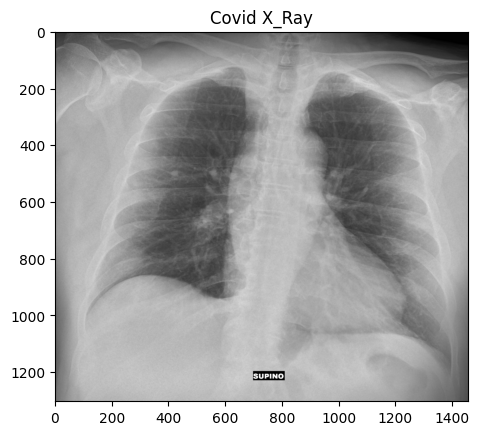

In [5]:
# image_covid
plt.imshow(cv2.imread('/content/Covid19-dataset/train/Covid/010.png'))
plt.title('Covid X_Ray')
plt.show()

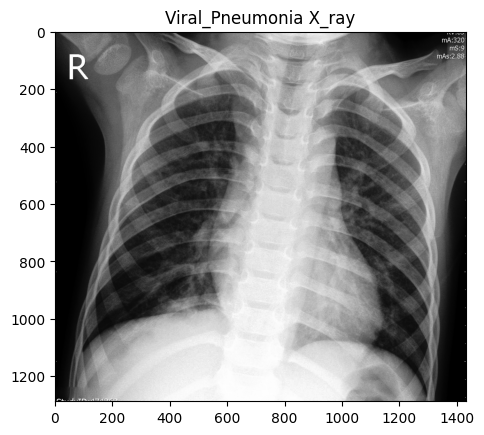

In [6]:
# image_Viral_Pneumonia
plt.imshow(cv2.imread('/content/Covid19-dataset/train/Viral Pneumonia/016.jpeg'))
plt.title('Viral_Pneumonia X_ray')
plt.show()

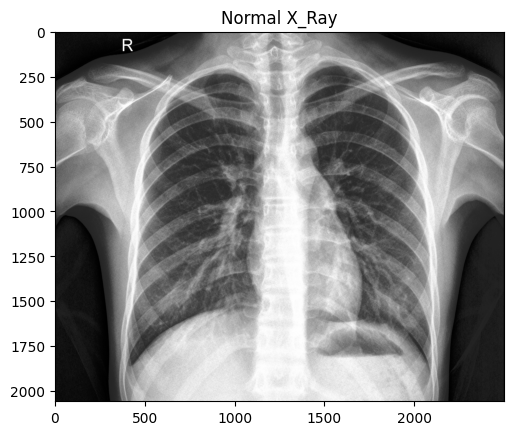

In [7]:
# image_normal
plt.imshow(cv2.imread('/content/Covid19-dataset/train/Normal/012.jpeg'))
plt.title('Normal X_Ray')
plt.show()

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import time
from keras.layers import Conv2D,Dense,Dropout,BatchNormalization,MaxPooling2D,Flatten
from keras import Sequential

In [9]:
train_dir='/content/Covid19-dataset/train'
test_dir='/content/Covid19-dataset/test'

## Splitting data into training and testing

In [10]:
train_data_gen=ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.1,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

In [11]:
test_data_gen=ImageDataGenerator(rescale=1./255)

In [12]:
train_data=test_data_gen.flow_from_directory(train_dir,target_size=(255,255),
                                             class_mode='categorical',batch_size=64)

Found 251 images belonging to 3 classes.


In [13]:
test_data=test_data_gen.flow_from_directory(test_dir,target_size=(255,255),class_mode='categorical',batch_size=16)

Found 66 images belonging to 3 classes.


## Model building 

In [14]:
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(255, 255, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.3))
model1.add(Flatten())
model1.add(Dense(1024,activation='relu'))
model1.add(Dense(512,activation='relu'))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(3,activation='softmax'))

In [15]:
from keras.callbacks import ModelCheckpoint

In [16]:
path='/content/checkpoints_01-{epoch:02d}-{val_accuracy:.2f}.h5'
checkpoint=ModelCheckpoint(filepath=path,save_best_only=True,monitor='val_accuracy',mode='max',verbose=1)

In [17]:
model1.compile(loss="categorical_crossentropy" ,optimizer='adam',metrics=['accuracy'])

In [19]:
H3 = model1.fit(train_data, validation_data=test_data, epochs=25, callbacks=[checkpoint], batch_size=10)


Epoch 1/25
4/4 [==============================] - ETA: 0s - loss: 0.6926 - accuracy: 0.8247
Epoch 1: val_accuracy improved from 0.39394 to 0.48485, saving model to /content/checkpoints_01-01-0.48.h5
4/4 [==============================] - 19s 5s/step - loss: 0.6926 - accuracy: 0.8247 - val_loss: 1.0863 - val_accuracy: 0.4848
Epoch 2/25
4/4 [==============================] - ETA: 0s - loss: 0.5076 - accuracy: 0.8008
Epoch 2: val_accuracy improved from 0.48485 to 0.87879, saving model to /content/checkpoints_01-02-0.88.h5
4/4 [==============================] - 24s 7s/step - loss: 0.5076 - accuracy: 0.8008 - val_loss: 0.4457 - val_accuracy: 0.8788
Epoch 3/25
4/4 [==============================] - ETA: 0s - loss: 0.3041 - accuracy: 0.8765
Epoch 3: val_accuracy did not improve from 0.87879
4/4 [==============================] - 15s 4s/step - loss: 0.3041 - accuracy: 0.8765 - val_loss: 0.6296 - val_accuracy: 0.7121
Epoch 4/25
4/4 [==============================] - ETA: 0s - loss: 0.2400 - acc

In [77]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

## Training and testing accuracy  

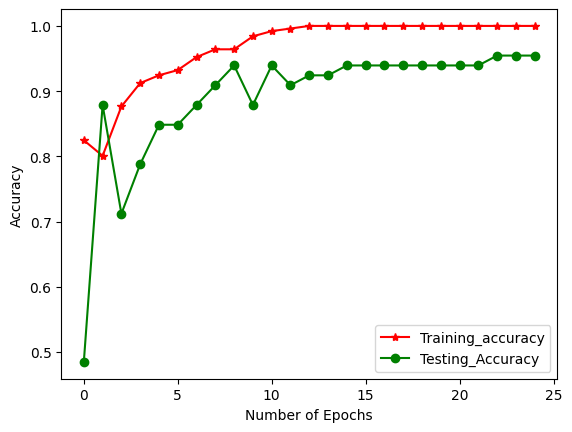

In [20]:
plt.plot(H3.epoch,H3.history['accuracy'],color='red',marker='*',label='Training_accuracy')
plt.plot(H3.epoch,H3.history['val_accuracy'],color='green',marker='o',label='Testing_Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Training and testing loss 

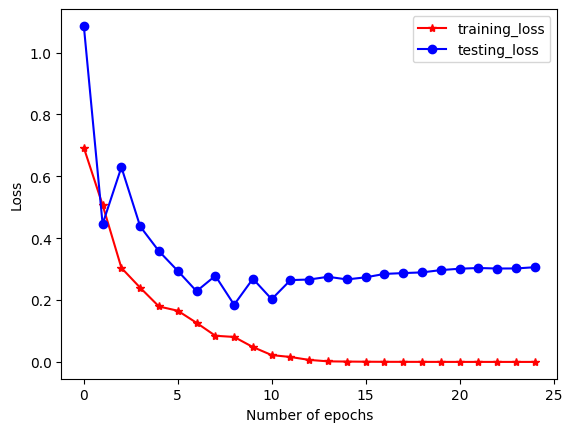

In [21]:
plt.plot(H3.epoch, H3.history['loss'], color='red', marker='*', label='training_loss')
plt.plot(H3.epoch, H3.history['val_loss'], color='blue', marker='o', label='testing_loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
from keras.models import load_model

In [23]:
load_model1=load_model('/content/checkpoints_01-23-0.95.h5')

In [24]:
load_model1.evaluate(test_data)

5/5 [==============================] - 2s 268ms/step - loss: 0.3021 - accuracy: 0.9545


[0.3020583689212799, 0.9545454382896423]

In [26]:
model1.save('x_ray.h5')

## Using pre train model (VGG16) 

In [42]:
from keras.applications.vgg16 import VGG16
pre_model=VGG16(weights="imagenet",include_top=False,input_shape=(255,255,3))

58889256/58889256 [==============================] - 0s 0us/step


In [43]:
pre_model.trainable=False

In [45]:
model4=Sequential()
model4.add(pre_model)
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Flatten())
model4.add(Dense(250,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(250,activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(3,activation='softmax'))

In [46]:
model4.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [50]:
path3='/content/checkpoint3-{epoch:02d}-{val_accuracy:.02}.h5'
checkpoint3 = ModelCheckpoint(filepath=path3,save_best_only=True,mode='max',monitor='val_accuracy')

In [51]:
H7=model4.fit(train_data,validation_data=test_data,callbacks=[checkpoint3],epochs=25,batch_size=10)

Epoch 1/25
4/4 [==============================] - 13s 3s/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.2819 - val_accuracy: 0.8788
Epoch 2/25
4/4 [==============================] - 14s 3s/step - loss: 0.0108 - accuracy: 0.9960 - val_loss: 0.1117 - val_accuracy: 0.9394
Epoch 3/25
4/4 [==============================] - 13s 3s/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1103 - val_accuracy: 0.9545
Epoch 4/25
4/4 [==============================] - 14s 3s/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.1795 - val_accuracy: 0.9091
Epoch 5/25
4/4 [==============================] - 13s 3s/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.3001 - val_accuracy: 0.8636
Epoch 6/25
4/4 [==============================] - 13s 3s/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.2283 - val_accuracy: 0.9091
Epoch 7/25
4/4 [==============================] - 13s 3s/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1158 - val_accuracy: 0.9394
Epoch 8/25
4/4 [==================

In [76]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 3, 3, 512)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_19 (Dense)            (None, 250)               1152250   
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_20 (Dense)            (None, 250)               62750     
                                                      

In [52]:
pre_model1=load_model('/content/checkpoint3-03-0.95.h5')

In [53]:
pre_model1.evaluate(test_data)

5/5 [==============================] - 2s 340ms/step - loss: 0.1103 - accuracy: 0.9545


[0.11033747345209122, 0.9545454382896423]

In [54]:
model4.save('x_ray by VGG16.h5')

## Training and testing accuracy

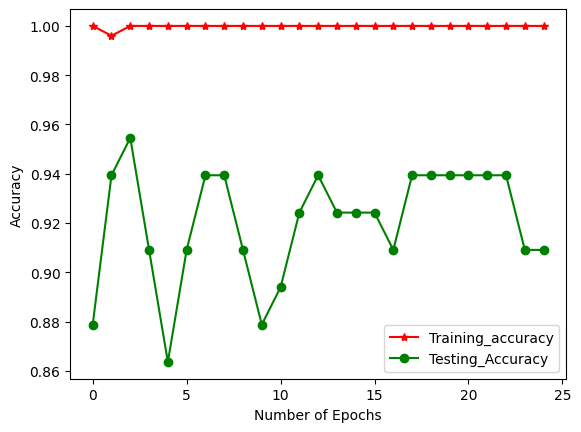

In [55]:
plt.plot(H7.epoch,H7.history['accuracy'],color='red',marker='*',label='Training_accuracy')
plt.plot(H7.epoch,H7.history['val_accuracy'],color='green',marker='o',label='Testing_Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Training and testing loss 

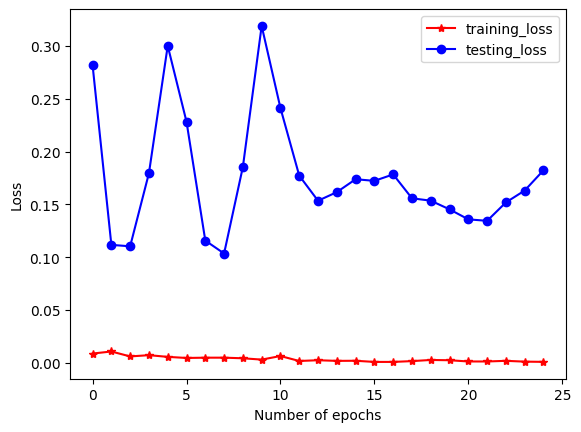

In [56]:
plt.plot(H7.epoch, H7.history['loss'], color='red', marker='*', label='training_loss')
plt.plot(H7.epoch, H7.history['val_loss'], color='blue', marker='o', label='testing_loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()